   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  


/var/folders/mb/t0rlzzmd4mv1nlj693qygfmh0000gn/T/ipykernel_81784/3350403061.py:81: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male':1,'female':0}, inplace=True)


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


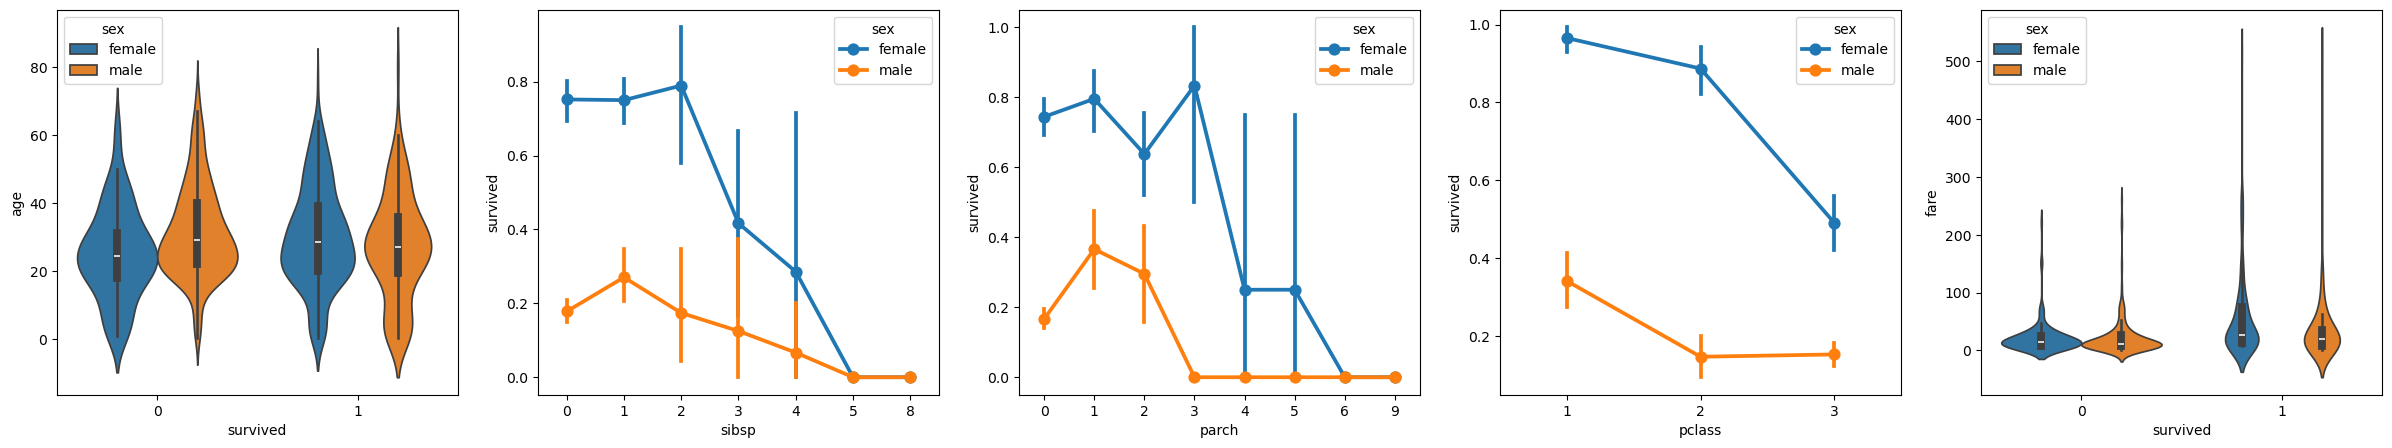

In [ ]:
# THIS PRACTICE WAS DONE BASED ON VS CODE GUIDE
# 다음번에 오면 "body" Missing values확인하기 

import pandas as pd
import numpy as np
import os 


# 파일 읽기
try:
    data = pd.read_csv('./raw_data_titanic3.csv')
    print(data.head())
except FileNotFoundError:
    print("File not found. Check the path and file name.")

# To make graphs, replacing the question mark with a missing value in age & fare columns that pandas is able to understand (numpy NaN value).
## np.nan: Special floating-point value indicating a missing number.
## inplace=True: Modifies the DataFrame directly instead of creating a new copy.

data.replace('?', np.nan, inplace=True)


# The updated columns might still be interpreted as strings. This line ensures they are correctly treated as numerical data (float 64)
data = data.astype({"age": np.float64, "fare": np.float64})

import seaborn as sns 
import matplotlib.pyplot as plt

# #Setting image save file path 
# #filepath = "/Users/celine/my_project/soyulcodes/Prediction_Models/Titanic_Survival_Correlation_Prediction"
# #def get_next_filename (filepath, base_name="image", ext="svg"):
# #    num = 1 
# #    while os.path.exists(f"{filepath}/{base_name}_{num}.{ext}"):
#         num += 1
#     return f"{filepath}/{base_name}_{num}.{ext}"

# def save_files (data, filepath, base_name="results", extensions=None):
#     if extensions is None: 
#         extensions = ["csv"]

#     saved_files = {}
#     for ext in extensions:
#         filename = get_next_filename (filepath, base_name, ext)
#         saved_files[ext] = filename 
        
#         if isinstance (data, pd.DataFrame) and ext == "csv":
#                 data.to_csv(filename, index=False)
            
#         elif isinstance(data, plt.Figure):
#             data.savefig(filename, format=ext)
        
#         print(f"Saved {ext.upper()} as: {filename}")
#     return saved_files
    

## figsize=(30,5): Sets the figure size to 30 units wide and 5 units high.
fig,axs = plt.subplots(ncols=5, figsize=(30,5))

## hue="sex": Differentiates the data by sex.
## Violin Plot: boxplot + density plot to show the distribution of age for survivors and non-survivors, split by sex.
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
# plt.save_files(filename, format='svg')

## Point Plot: Displays the mean survival rate for each sibling/spouse count (sibsp), split by sex. --> To see if having more siblings/spouses on board affected survival.
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
# plt.savefig(filename, format='svg')

## Point Plot: Shows the average survival rate for different numbers of parents/children (parch) aboard, split by sex. --> To understand how family size influenced survival.
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
# plt.savefig(filename, format='svg')

## Point Plot: Illustrates the relationship between passenger class (pclass) and survival, split by sex.--> To analyse the survival disparity between classes.
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
# plt.savefig(filename, format='svg')

## 	Violin Plot: Shows fare distribution for survivors and non-survivors, split by sex. -->	To explore whether higher fares correlated with higher survival rates.
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])
# plt.savefig(filename, format='svg')

# Calculate correlation(survival, input variables) via Pandas
# Encoding Categorical Data == Convert string values to numeric integers (ML requires numerical input)
data.replace({'male':1,'female':0}, inplace=True)
# save_files(df, filepath)

#Analyze the correlation between all the input variables to idnetify the features that would be the best inputs to a ML model.
## numeric_only=True: Ensures only numeric columns are included in the correlation calculation.
## abs(): Returns the absolute values of correlations --> Treat both positive and negative correlations equally --> allow us to quickly see the strongest correlations. 
## .corr() method calculates the Pearson correlation coefficient between variables, which can range from -1 to 1:
### 1: Perfect positive correlation, -1: Perfect negative correlation, 0: No correlation
### When analysing correlations, we often care about the strength rather than the direction (positive or negative).

data.corr(numeric_only=True).abs()[["survived"]]

# if written "data.corr(numeric_only=True).abs()["survived"]" --> return a Series rather than a DataFrame.
# With double brackets, we are explicitly asking for a subset of the DataFrame, preserving the 2D structure.


In [6]:

# Hypo: Having relatives on board could significantly affect survival chances. 
# sibsp (siblings/spouse) and parch (parents/children) are treated as indicators of whether the passenger had family on board.
# sibsp and parch are combined into a new column called “relatives”.


# Check if for a given passenger, #(sibsp + parch)> 0 and, if so, they had a relative on board.


## apply(): to iterate through each row of the DataFrame.
## Lambda function: Takes a row as input, checks if the sum of sibsp and parch is greater than 0.
###	If yes, it returns 1 (indicating at least one relative); otherwise, it returns 0.
#### Lambda x: x*2 means, "take x and return x*2" --> Hence, below, 내가 봤을 때는 "take row and if int((row['sibsp'] + row['parch']) > 0, axis=1"
## axis=1: Specifies that the function is applied to rows (not columns).

data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)

# Calculates the correlation between “survived” and other numerical features.--> o see if the newly created “relatives” column has a higher correlation with survival than the original sibsp and parch columns.
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [7]:
# notice that in fact when looked at from the standpoint of whether a person had relatives, versus how many relatives, there is a higher correlation with survival.
# Drop from the dataset the low value sibsp and parch columns, as well as any rows that had NaN values.
# Why? To end up with a dataset that can be used for training a model.
## Simplifying the dataset improves model efficiency and accuracy.

# Although age had a low direct correlation, it was kept because it seems reasonable that it might still have correlation in conjunction with other inputs.


data = data[['sex', 'pclass', 'age','relatives','fare','survived']].dropna()


[Train and evaluate Model]

With the dataset ready, begin creating a model. For this section, use the scikit-learn library as it offers some useful helper functions. 

To do pre-processing of the dataset:
1. train a classification model to determine survivability on the Titanic, and 
2. Then use that model with test data to determine its accuracy.

A common first step to training a model is to divide up the dataset into training and validation data. 

This allows you to use a portion of the data to train the model and a portion of the data to test the model. 


If you used all your data to train the model, you wouldn't have a way to estimate how well it would actually perform against data the model hasn't yet seen. A benefit of the scikit-learn library is that it provides a method specifically for splitting a dataset into training and test data.

In [8]:
# divide up the dataset into training and validation data. 
## train_test_split(): Splits data into training (80%) and testing (20%) sets.
## test_size=0.2: Reserves 20% for testing.
## random_state=0: Ensures reproducibility by setting a random seed.
## x_train, x_test: Feature sets for training and testing.
## y_train, y_test: Target labels for training and testing.



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)

Scale the input values == Normalize the inputs such that all features are treated equally. For example, within the dataset the values for age range from ~0-100, while gender is only a 1 or 0. 

By normalizing all the variables, you can ensure that the ranges of values are all the same. 

In [9]:
# Scale the input values == Normalize the inputs such that all features are treated equally.
# Ensures that all features have a mean of 0 and a standard deviation of 1.
## fit_transform(): Fits the scaler on the training data and transforms it.
## transform(): Applies the same scaling to the test data.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

There are many different <machine learning algorithms> that you could choose from to model the data. 다음번엔 이것 확인해보기!

To model the data, we use the Naïve Bayes algorithm>, a common algorithm for classification problems.
<Nive Bayes algorithm>:
 1. Is suitable fo  binary classification tasks, 
 2. Is efficient for continuous data (GaussianNB handles continuous features).
 3. Assumes features are conditionally independent given the class, which works well for simpler problems.


In [ ]:
## 	fit(): Trains the model using the training data.

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Evaluate the model's performance: Test the data set that was held back from training
# == Predict the outcome of the test data and calculate the accuracy of the model.
## model.predict(): Uses the trained model to predict survival on the test set.
## metrics.accuracy_score(): Compares the predicted values with the actual y_test values to calculate accuracy.


from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


>>> 다음번에  dense (Dense)                   │ (None, 5)              │            30 에서 None에 들어가는게 뭔지 확인

[Use a Neural Network]

NN uses weights and activation functions, modeling aspects of human neurons, to determine an outcome based on provided inputs. Unlike the ML algorithm you looked at previously, NN are a form of deep learning wherein you don't need to know an ideal algorithm for your problem set ahead of time. 

NN can be used for many different scenarios and classification is one of them. For this section, we'll <Keras library>, a high-level NN API, part of <TensorFlow.>  

* <rectified linear unit (relu) activation function>: used as a good general activation function for the first two layers
* <sigmoid activation function>: required for the final layer as the output we want (of whether a passenger survives or not) needs to be scaled in the range of 0-1 (the probability of a passenger surviving).



--
[Define NN Model]
1. Sequential NN Model: a layered neural network wherein there are multiple layers that feed into each other in sequence. Simple structure where layers are stacked in sequence. Ideal for straightforward feedforward networks.
2. Dense layers: A fully connected layer where each neuron from one layer connects to every neuron in the next layer.


In [ ]:
# Define NN Model


from keras.models import Sequential 
from keras.layers import Dense

# Creates an empty neural network model. 
## Why: You start with an empty Sequential model to which layers are added one by one.

model = Sequential() 


# Add the NN layers. For now, just use three layers.
## first layer: dimension of 5 since we have five inputs: sex, pclass, age, relatives, and fare.
### input_dim=5: Specifies the number of input features (sex, pclass, age, relatives, fare).

## Activation Function (ReLU):
### ReLU (Rectified Linear Unit): max(0, x), efficient for most NN tasks. Helps mitigate the vanishing gradient problem by allowing positive values to pass through.
### Kernel Initialiser (Uniform):Randomly initialises the weights in a uniform distribution. --> Ensures that initial weights are not too small or too large.
### 다음번엔 Kernerl Initialiser 종류 알아보기 

model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))

## Set middle layer at 5 for simplicity. The value can be different. 
## A HIDDEN Layer with 5 neurons and ReLU activation
### Why ReLU Again: 1. Keeps non-linearity; and 2. prevents vanishing gradients.
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))

## Set the last layer at 1 because we want 1-dimensional output indicating whether a passenger would survive. 
## == Scale in the range of 0-1 (the probability of a passenger surviving
###  Dense(1): Only 1 neuron because the output is binary (survived or not).
### Activation Function (Sigmoid): 
#### Produces output in the range [0, 1], interpreted as the probability of survival.
#### Ideal for binary classification tasks.
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# View the summary of the model
model.summary()

/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

Once the model is created, it needs to be compiled. This step may take anywhere from a few seconds to a few minutes to run depending on your machine.

In [12]:
# Choose the optimiser type (how loss will be calculated, what metric should be optimised)
# Build & train the model 


# <Build> 
# Optimizer (Adam): Combines the advantages of AdaGrad + RMSProp. Efficient for large data and high-dimensional parameter spaces.
# Loss (Binary Crossentropy):
## 1. Suitable for binary classification.
## 2. Measures the difference between the actual and predicted probabilities.
# Metrics (Accuracy):	Used to evaluate model performance. Outputs the percentage of correctly predicted labels.
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])


# <Train>
# Batch Size (32): # of samplesnprocessed before updating the model.
## Smaller batches --> make the model more responsive to changes in the data.

# Epochs (50): # of complete passes through the training dataset.
## More epochs --> help the model learn better but can lead to overfitting.

# fit(): Fits the model on the training data.
model.fit(X_train, y_train, batch_size=32, epochs=50)

# see how the built & trained model works aginst the test data
# The result yields 79%. Using this simple NN, the result is better than the 75% accuracy from the Naive Bayes Classifier tried previously.
## model.predict(X_test): Predicts the probability of survival for each test sample.
## .flatten(): Converts the output array to a 1D array.
## np.rint(): Rounds the predicted probability to the nearest integer (0 or 1), as the output from the sigmoid function can be any value between 0 and 1.

y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.5206 - loss: 0.6928
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.5648 - loss: 0.6909
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.5895 - loss: 0.6852
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.5853 - loss: 0.6746
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6019 - loss: 0.6547
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.6111 - loss: 0.6248
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.6087 - loss: 0.6186
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.7343 - loss: 0.5935
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.7719 - loss: 0.5710
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7890 - loss: 0.5485
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.7680 - loss: 0.5566
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step